<a href="https://colab.research.google.com/github/Rajasri1011-v/ai_project/blob/main/ai_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed
<ipython-input-5-63b557d4b0e8>:31: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(columns_to_drop, axis = 1)


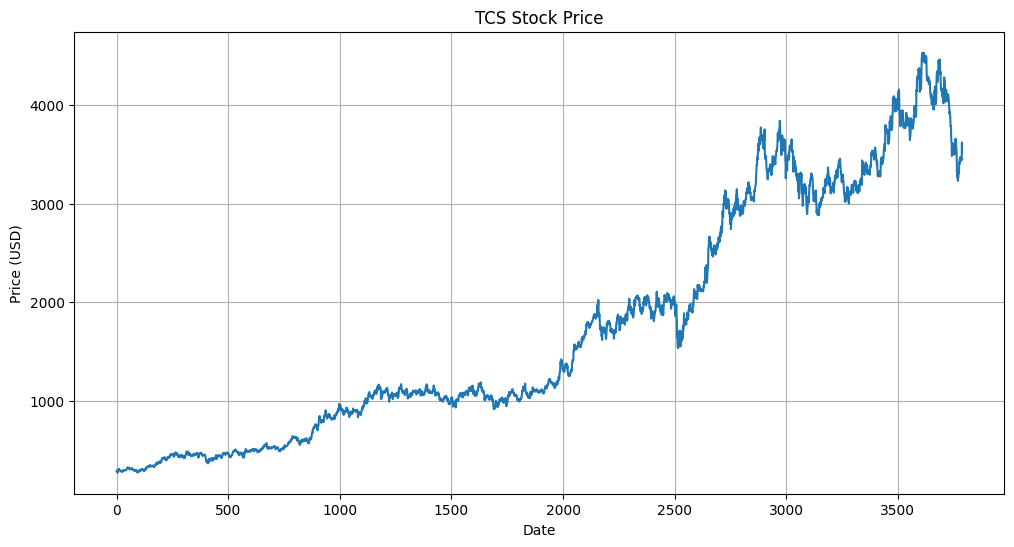

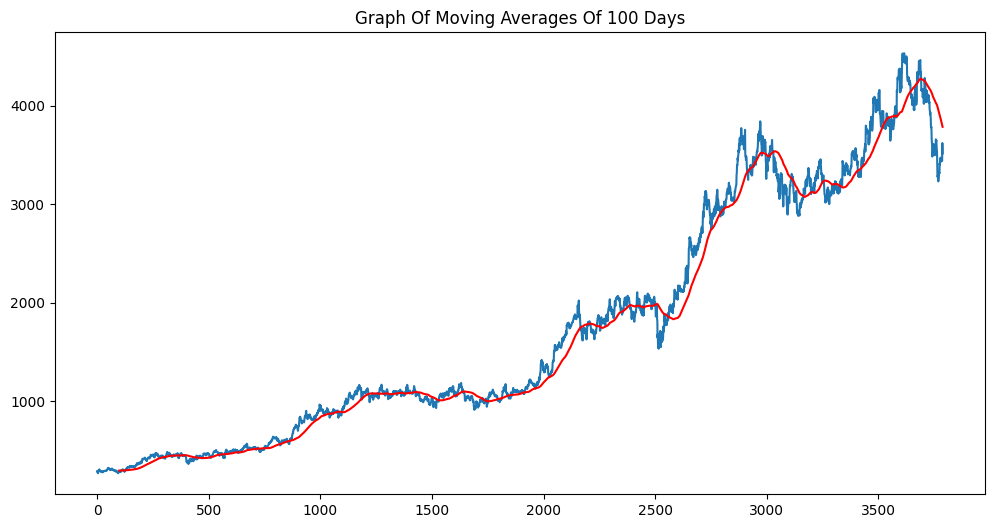

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

(1137, 100, 1)
(1137,)
Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 34s 326ms/step - MAE: 0.1639 - loss: 0.0557 - val_MAE: 0.0616 - val_loss: 0.0059
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 40s 310ms/step - MAE: 0.0535 - loss: 0.0059 - val_MAE: 0.1360 - val_loss: 0.0227
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 310ms/step - MAE: 0.0578 - loss: 0.0069 - val_MAE: 0.0765 - val_loss: 0.0084
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 40s 302ms/step - MAE: 0.0448 - loss: 0.0044 - val_MAE: 0.0733 - val_loss: 0.0078
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 303ms/step - MAE: 0.0447 - loss: 0.0043 - val_MAE: 0.0460 - val_loss: 0.0034
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 44s 344ms/step - MAE: 0.0451 - loss: 0.0045 - val_MAE: 0.0466 - val_loss: 0.0036
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 40s 337ms/step - MAE: 0.0410 - loss: 0.0037 - val_MAE: 0.0470 - val_loss: 0.0037
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 24s 300ms/step - MAE: 0.0394 - loss: 0.0035 - val_MAE: 0.0448 - val_loss: 0.0034
Epoch 9/100
80/80

36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step


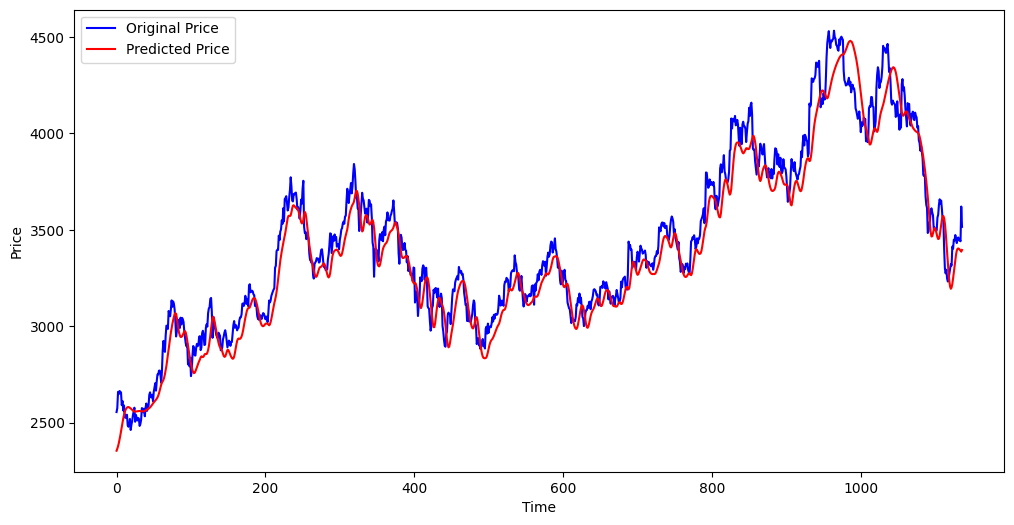

Mean absolute error on test set: 2.64%
R2 score: 0.9380790519249047


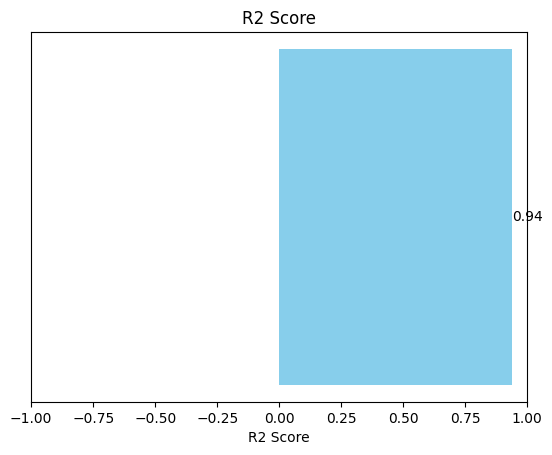

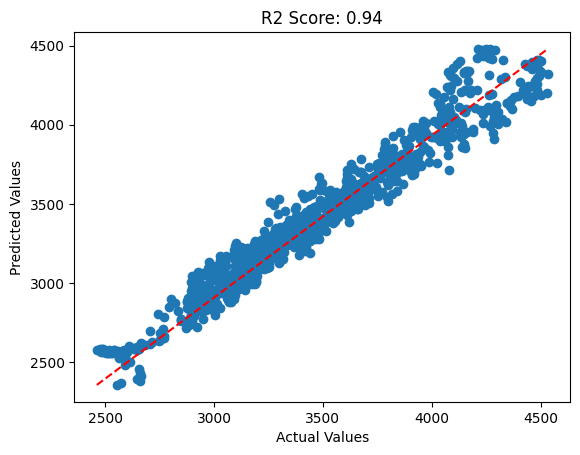

In [5]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_absolute_error, r2_score

START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset
def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

data = load_data('TCS.NS')
df = data
df.head()

# Check if 'Adj Close' column exists before dropping
columns_to_drop = ['Date']
if 'Adj Close' in df.columns:
    columns_to_drop.append('Adj Close')

df = df.drop(columns_to_drop, axis = 1)
df.head()

plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()

ma100 = df.Close.rolling(100).mean()
ma100

plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.title('Graph Of Moving Averages Of 100 Days')
plt.show() # Added plt.show() here

df.shape

# Split data into training and testing sets
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): len(df)])

# The lines below are now relevant after splitting
train = data_training
test = data_testing

train.head()
test.head()

scaler = MinMaxScaler(feature_range=(0,1))

# Reshape for scaler
train_close = train.values.reshape(-1, 1)
test_close = test.values.reshape(-1, 1)

data_training_array = scaler.fit_transform(train_close)
data_training_array

x_train = []
y_train = []
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape

model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
                ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1))
model.summary()

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MAE'])

# Prepare testing data for model validation
# Need to concatenate the last 100 days of training data to the testing data
past_100_days = data_training.tail(100)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

# Ensure final_df is treated as a DataFrame with a single column for scaling
final_df = final_df.values.reshape(-1, 1)

input_data = scaler.fit_transform(final_df)

x_test = []
y_test = []
# Start from 100 to create sequences
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

print(x_test.shape)
print(y_test.shape)

model.fit(x_train, y_train, validation_data = (x_test, y_test) ,epochs = 100)
model.save('keras_model.h5')

test_close.shape
test_close

# Making predictions
y_pred = model.predict(x_test)
y_pred.shape
y_test
y_pred

# Inverse transform the predictions and actual values
# Need to use the scaler fitted on the training data
# scaler.scale_ attribute gives the scale factor for each feature
# Use inverse_transform directly on the scaler used for the training data
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))


plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

# Actual values
actual = y_test
# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)
print("R2 score:", r2)

# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')
# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')
plt.show()

# scatter plot of the R2 score
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()